# STA 243 - 
 - Collin Kennedy




 ## Implementation of Randomized Matrix Multiplication Algorithm

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#read in matrix A and matrix B
with open("/Users/collinkennedy/Dropbox/R_dropbox/STA243/Computational_Statistics/STA243_homework_1_matrix_A.csv") as file_name:
    A= np.loadtxt(file_name, delimiter=",")

with open("/Users/collinkennedy/Dropbox/R_dropbox/STA243/Computational_Statistics/STA243_homework_1_matrix_B.csv") as file_name:
    B = np.loadtxt(file_name, delimiter = ",")

In [139]:

def random_matrix_mult(matrixA,matrixB,r, uniform_sampling = False):
    #make sure dimensions are appropriate for multiplication in the first place
    if matrixA.shape[1] != matrixB.shape[0]:
        raise ValueError('improper dimensions for matrix multiplication') #throw error if dimensions are incompatible
    n = matrixA.shape[1]

    #this will be used in calculating the optimal probabilities when we are not doing uniform sampling
    sum_of_magnitudes = 0
    for k in range(1,n+1):
        sum_of_magnitudes = sum_of_magnitudes + np.linalg.norm(matrixA[:,k-1],ord=2)*np.linalg.norm(matrixB[k-1,:],ord=2)


    #create kth probability (should be a list of n of them) 
    p_k = [np.linalg.norm(matrixA[:,k-1], ord = 2) * np.linalg.norm(matrixB[k-1,:], ord = 2)/sum_of_magnitudes for k in range(1,n+1)]

    #pick the i_ls (there should be 'r' of them) from the range of 1 to n
    list_i_ls = np.random.choice(range(1,n+1),r,replace = True,p=p_k) #we do n+1 because upper bound parameter is non-inclusive

    M = np.zeros((matrixA.shape[0],matrixB.shape[1])) #initialize empty matrix


    if uniform_sampling == True: #just use 1/n
        p_k = 1/n

    #loop through list of i's, create the matrix X_l, and add X_l to the matrix M
        for i in list_i_ls: #this should loop 'r' number of times

            for k in range(1,n+1):

                if i == k: #this is like the indicator function == 1:
                    X_l = (1/(r*p_k))*np.outer(matrixA[:,k-1], matrixB[k-1,:]) #k-1 due to indexing (ie, first row k=1 is really 0th row)
                    
                    #append X_l to M (adding into M)
                    M = M + X_l

                else:
                    continue
    else: #non-uniform random sampling. optimize probability selection to minimize error   

        for i in list_i_ls: #this should loop 'r' number of times

            for k in range(1,n+1):

                if i == k: #this is like the indicator function == 1:
                    X_l = (1/(r*p_k[k-1]))*np.outer(matrixA[:,k-1], matrixB[k-1,:])
                    
                    #append X_l to M (adding into M)
                    M = M + X_l

                else:
                    continue      




    return(M)
    #else: #gotta calculate p_k




In [104]:

def approx_error(estimator_matrix, matrixA,matrixB):
    true_matrix = matrixA @ matrixB
    approximation_error = (np.linalg.norm(estimator_matrix - true_matrix))/((np.linalg.norm(matrixA))*np.linalg.norm(matrixB))
    return(approximation_error)

In [140]:
#calculate error for different values of r
list_of_rs = [20,50,100,200]

AB = np.matmul(A,B)
approx_error_dict = dict()
for r in list_of_rs:
    #calculate M using the correct value of r
    M = random_matrix_mult(A,B,r=r, uniform_sampling = False)
    approximation_error = approx_error(M,A,B)

    #append the approximation error 
    approx_error_dict["r = {}".format(r)] = approximation_error


d. Visualizing Approximation Error

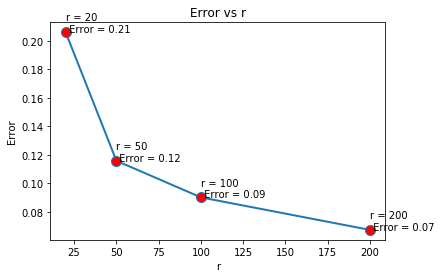

In [141]:

#get the approximation error values from the dictionary
vals = list(approx_error_dict.values())
vals

#visualize the approximation error
plt.plot(list_of_rs, vals, ls = '-', lw = 2, marker = 'o',
         markersize = 10,
         markerfacecolor = 'red', label = 'Non-uniform sampling')
plt.xlabel('r')
plt.ylabel('Error')
plt.title('Error vs r')
for i in range(len(list_of_rs)):
    plt.annotate("r = {} \n Error = {:.2f}".format(list_of_rs[i],vals[i]), (list_of_rs[i], vals[i]))
    